# Backpropagation Lab





In [2]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [3]:
# Import the data from iris.arff
Data_Set = arff.loadarff('iris.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
X = X.astype(float)
y = Data_Set_np[:, -1]

# One hot encode the output
y = pd.get_dummies(y)
y = y.to_numpy()
y = y.astype(float)

In [4]:
# Iris with no regularization


for i in range(4):  # Do it 4 times
    # Random 80/20 split of the data
    print(f"----Training Split {i + 1}----")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Train the model
    clf = MLPClassifier(hidden_layer_sizes = [64], activation = 'logistic',
                        solver = 'sgd', alpha = 0, batch_size = 1,
                        learning_rate_init = 0.01, shuffle = True, momentum = 0,
                        n_iter_no_change = 50, max_iter=1000)
    clf.fit(X_train, y_train)
    # Print results
    print("Iterations until convergence: ", clf.n_iter_)
    print("Training accuracy", clf.score(X_train, y_train))
    print("Test accuracy", clf.score(X_test, y_test))
    print()

print()
print("Softmax Probabilities")
print(clf.predict_proba(X_test[:-1]))

----Training Split 1----
Iterations until convergence:  460
Training accuracy 0.9416666666666667
Test accuracy 0.9333333333333333

----Training Split 2----
Iterations until convergence:  385
Training accuracy 0.9416666666666667
Test accuracy 0.9666666666666667

----Training Split 3----
Iterations until convergence:  279
Training accuracy 0.9833333333333333
Test accuracy 0.9666666666666667

----Training Split 4----
Iterations until convergence:  237
Training accuracy 0.975
Test accuracy 0.9333333333333333


Softmax Probabilities
[[1.59921928e-04 8.26240617e-01 8.30519523e-02]
 [9.99493433e-01 3.18780661e-03 2.75830906e-11]
 [9.99485193e-01 3.12738475e-03 2.85929526e-11]
 [9.99271844e-01 5.34115248e-03 3.76586216e-11]
 [9.98834494e-01 1.01493647e-02 5.81370872e-11]
 [9.98933019e-01 9.51873556e-03 5.31783240e-11]
 [1.54192633e-02 9.87984543e-01 3.54429589e-05]
 [5.43975352e-06 2.05030294e-02 9.91273566e-01]
 [9.99160329e-01 5.61243315e-03 4.53560257e-11]
 [1.84254262e-05 1.22666121e-01 9.

After using one-hot coding to split the iris data set into binary values [1,0,0], [0,1,0], and [0,0,1] and converting the data into the correct format, I ran the MLP model. Using an 80% of the data as the training set and 20% for the test, I ran the model several times with a large amount of iterations. Each model took about 300 iterations to converge with a training accuracy of about 98-99% (on average) and a test accuracy of 95%. Also, on the last iteration, I found the softmaz probabilities (as shown above) which are estimats of which type of flower each input is.

The model that I ran was quite accurate for the data set. This is likely because of the simplicity and small size of the data. However, the algorithm was quite slow becuase it ran so many iterations. This likely caused it to overfit the data, leading to a smaller test accuracy.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

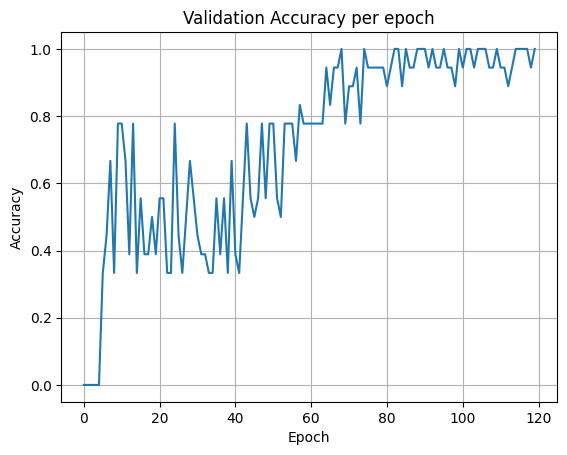

In [5]:
#Iris with early stopping and validation scores graph
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = MLPClassifier(hidden_layer_sizes = [64], activation = 'logistic',
                    solver = 'sgd', alpha = 0, batch_size = 1,
                    learning_rate_init = 0.01, shuffle = True, momentum = 0,
                    n_iter_no_change = 50, max_iter=1000, early_stopping=True,
                    validation_fraction=0.15).fit(X_train, y_train)

# plot the data
epochs = np.arange(0, clf.n_iter_)   # For each epoch
plt.plot(epochs, clf.validation_scores_)
plt.title('Validation Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid() # add grid lines
plt.show() # show the plot

I ran the same model on the data set. But, this time, I set the early_stopping parameter to true. This made the algorithm stop sooner when little improvement was made on the validation accuracy. So, instead of taking 300 iterations, the model converged at 137 (in this case). Its validation set accuracy was lower than expected at 94%. Also it had a training accuracy of 97.5% and test accuracy of 96.7%.

I created a graph to measure the validation accuracy after each epoch. And after about 75 epochs, little change was made on the accuracy.

In this case, the model was less accurate just becuase the data set was much smaller and had little noise. For larger data sets with noise, the early_stopping parameter will prevent data form overfitting, make it have a higher test set accuracy.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [8]:
#Iris with Loss Regularization
# Random 80/20 split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Data for the table
regularization_values = [.00001, 0.001, 0.01, 0.1, 0.5]
num_iterations = []
training_accuracy = []
test_accuracy = []
best_losses = []
table_data = [["Regularization", "Iterations Till Convergence",	"Training accuracy",
               "Test Accuracy", "Best loss value"]]

for regularization in regularization_values:   # For each regularization value
    # Train the model
    clf = MLPClassifier(hidden_layer_sizes = [64], activation = 'logistic',
                        solver = 'sgd', alpha = regularization, batch_size = 1,
                        learning_rate_init = 0.01, shuffle = True, momentum = 0,
                        n_iter_no_change = 50, max_iter=1000).fit(X_train, y_train)
    # record data about each iteration
    num_iterations.append(clf.n_iter_)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    best_losses.append(clf.best_loss_)
    table_data.append([regularization, clf.n_iter_, clf.score(X_train, y_train),
                       clf.score(X_test, y_test), clf.best_loss_])

table = tabulate(table_data, headers="firstrow")
print(table)

  Regularization    Iterations Till Convergence    Training accuracy    Test Accuracy    Best loss value
----------------  -----------------------------  -------------------  ---------------  -----------------
           1e-05                            326             0.975            0.9               0.0950513
           0.001                            437             0.975            0.9               0.20801
           0.01                             392             0.983333         1                 0.757739
           0.1                              189             0.558333         0.466667          1.63435
           0.5                               88             0                0                 1.89499


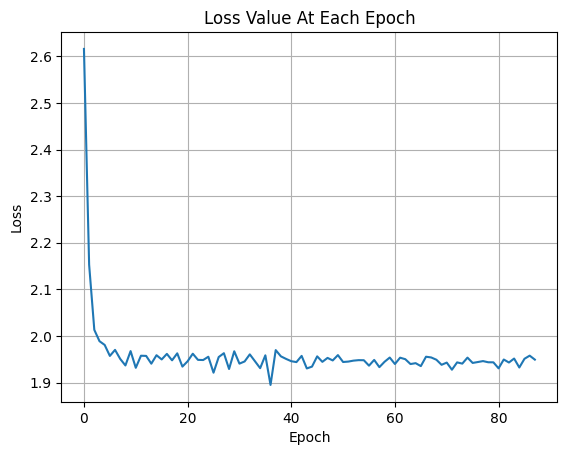

In [14]:
# plot the data
epochs = np.arange(0, clf.n_iter_)   # For each epoch
plt.plot(epochs, clf.loss_curve_)
plt.title('Loss Value At Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid() # add grid lines
plt.show() # show the plot

This time, I ran the model using regularization rather than early stopping. Regularization affects the loss function. With a small regularization value, the weights are updated slower and all end up closer to 0. In this particular case, I used the regularization values 0.00001, 0.001, 0.01, 0.1, and 0.5. As expected, the lower regularization values took more iterations to converge. Also, the model was more accurate with the smallest regularization (with a training accuracy of 97.5% and a nearly perfect test accuracy). Furthermore, the best loss value was smaller whenever regularization was smaller.

In this particular case, the most accurate model was the first one (without regularization and without early stopping). The early stopping method was the second most accurate method. By stopping at a specified validation set accuracy, the model did not overfit the data. And, regularization was the least accurate. The time it took for the algorithm to run only seemed to increase without improving the accuracy. I think that this is because the data set was small and didn't have much noise. Regularization and early stopping are created in order to minimize the negative effects of noise. Since this data had little noise, there was no need to use these methods.

I also graphed the loss value at each epoch with the regularization value of 0.00001. The loss value drastically decreased afte the first few epochs and than remained the same for the next 80. So, the model learned quickly and may have performed more epochs than needed.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

In [ ]:
# Import the data from vowel.arff
Data_Set = arff.loadarff('vowel.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# Find the number each target occurs
print(np.count_nonzero(y == b'hid'))
print(np.count_nonzero(y == b'hId'))
print(np.count_nonzero(y == b'hEd'))
print(np.count_nonzero(y == b'hAd'))
print(np.count_nonzero(y == b'hYd'))
print(np.count_nonzero(y == b'had'))
print(np.count_nonzero(y == b'hOd'))
print(np.count_nonzero(y == b'hod'))
print(np.count_nonzero(y == b'hUd'))
print(np.count_nonzero(y == b'hud'))
print(np.count_nonzero(y == b'hed'))
print("Baseline Accuracy: ", 1 / 11)

90
90
90
90
90
90
90
90
90
90
90
Baseline Accuracy:  0.09090909090909091


The baseline accuracy for the Iris data set is 33.3%. This is becuase there are three different classifications, each containing 1/3 of of the data set. Also, the baseline accuracy for the Vowel dataset is 9.09%. This is becuase there are 11 different classes, each with the same amount of instance (as calculated in the code above). This means, that if the model were to just return the most common class, the Iris data set would be correct 33.3% of the time and the Vowel dataset would be correct 9.09% of it.

The Vowel dataset will likely have a lower accuracy than the Iris dataset simply becuase it has more classes to generalize. Rather than predicting something to be one of three classes, each input has 11 possible values (increasing the chance of error).

The vowel data set has 10 features which are used to predict the class. The first of which is just used to split the data into training and test sets. So, we may ignore that feature and use our own random split. The second feature is the name of the speaker. This likely has no affect on the sound of the vowel and would be extremely hard to convert to a real input. So, we can remove that feature as well. The third feature is the gender, which may have an effect on the pheonetic properties of the vowel. So, it likely needs to be included. And, the remaining features are all real values that we do not have enough information about to decide if they are necessary. So, we likely cannot remove anything else until further analysis is made.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model a fair chance.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [ ]:
# Train with different learning rates

# Import the data from vowel.arff
vowel = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(Data_Set[0], columns=["Train or Test", "Speaker Number",
                                              "Sex", "Feature 0", "Feature 1",
                                              "Feature 2", "Feature 3",
                                              "Feature 4", "Feature 5",
                                              "Feature 6", "Feature 7",
                                              "Feature 8", "Feature 9", "Class"])

# Convert the data into a useable format
# Remove train/test and name features
vowel_df = vowel_df.drop(labels=["Train or Test", "Speaker Number"], axis=1)

#Changes the byte code data into a normal string, b'Male' becomes "Male"
vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')
vowel_df = vowel_df.replace('Male', 0)
vowel_df = vowel_df.replace('Female', 1)

# Convert to numpy array and split into X and y
vowel_df = vowel_df.to_numpy()
X = vowel_df[:, :-1]
X = X.astype(float)

# Onehot encode to convert classes to usable data
y = vowel_df[:, -1]
y = pd.get_dummies(y)
y = y.to_numpy()
y = y.astype(float)

In [ ]:
# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
input_size = np.shape(X_train)[0]

# Data to be used
learning_rates = [0.001, 0.01, 0.1, 1, 10]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Learning Rate", "Epochs Till Convergence",	"Training accuracy",
               "Test Accuracy"]]

for learning_rate in learning_rates:
    # Train the model
    clf = MLPClassifier(hidden_layer_sizes = [input_size * 2], shuffle = True,
                        momentum = 0, learning_rate_init = learning_rate,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 1000)
    clf.fit(X_train, y_train)

    # record data about each iteration
    num_iterations.append(clf.n_iter_)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    table_data.append([learning_rate, clf.n_iter_,
                       clf.score(X_train, y_train), clf.score(X_test, y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate    Epochs Till Convergence    Training accuracy    Test Accuracy
---------------  -------------------------  -------------------  ---------------
          0.001                       1000             0.839623         0.733871
          0.01                         801             1                0.935484
          0.1                          796             1                0.846774
          1                            459             0.756065         0.584677
         10                             52             0                0


First, to upload the data, I removed the name feature and test/training feature (creating my own test/training split). Also, I set the gender male to 0 and female to 1. Finally, I one-hot encoded the classes in order to make it binary.

I ran the MLP model 5 times, each on a different learning rate. Each model took much longer than expected. This was likely because of the large amount of hidden nodes in the hidden layer. But, after a few minutes, each model was trained.

The high learning rates of 1 and 10 were very inaccurate, converging far too early (after 50-200 epochs). The highest test accuracy of the two was only 40%, which is not much better than baseline accuracy. Things improved a lot for the learning rates of 0.1 and 0.01. The model converged at around 750 epochs and was about 90% accurate on the tests. But, I believe that the data was overfitting since the training accuracy was 100%. Finally, due to the hyperparameters I set, the learning rate of 0.001 stopped at 1000 epochs (before it converged). So, it was not as accurate as the other models. But, I believe that if I were to increase the maximum amount of iterations, it would be the most accurate model.

In conclusion, smaller learning rates improved the training and test accuracies. But, they came with the cost of runtime by increasing the number of epochs needed for convergence.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [ ]:
# Train with different numbers of hidden nodes

# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Data to be used
hidden_nodes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Hidden Nodes", "Epochs Till Convergence",	"Training accuracy",
               "Test Accuracy"]]

for hidden_node in hidden_nodes:
    # Train the model
    clf = MLPClassifier(hidden_layer_sizes = [hidden_node], shuffle = True,
                        momentum = 0, learning_rate_init = 0.01,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 1500)
    clf.fit(X_train, y_train)

    # record data about each iteration
    num_iterations.append(clf.n_iter_)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    table_data.append([hidden_node, clf.n_iter_,
                       clf.score(X_train, y_train), clf.score(X_test, y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

  Hidden Nodes    Epochs Till Convergence    Training accuracy    Test Accuracy
--------------  -------------------------  -------------------  ---------------
             1                        139             0               0
             2                       1500             0.083558        0.0524194
             4                       1500             0.269542        0.254032
             8                       1500             0.652291        0.552419
            16                       1500             0.878706        0.737903
            32                       1500             1               0.834677
            64                       1273             1               0.903226
           128                        960             1               0.903226
           256                        873             1               0.907258
           512                        843             1               0.915323
          1024                        824             1 

*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

Using a learning rate of 0.01, I ran the same machine learning model. But, rather than changing the learning rate for each model, I changed the amount of hidden nodes. Starting with 1, I doubled the amount of hidden nodes until I reached 1024 (see table above). This was when the test was less accurate than the last. So, in this case, the model was most accurate when it used 512 nodes (with a training accuracy of 100% and test accuracy of 93.5%).

I noticed that as the number of hidden node increased, the number of epochs it took to converge decreased (with the exception of when I used 1 or 2 hidden nodes, which trivally compares to the single-layer Perceptron). This makes sense because each hidden node provides more information. So, each epoch takes longer but does more. Also, as the number of nodes increased, the training accuracy and test accuracy increased. This was true until the number of hidden nodes was so large that it accounted for the noise as well.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [ ]:
# Train with different momentum values
# Train with different numbers of hidden nodes

# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
input_size = np.shape(X_train)[0]

# Data to be used
momentums = [0.01, 0.1, 0.5, 0.9, 0.99]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Momentum", "Epochs Till Convergence", "Training accuracy",
               "Test Accuracy"]]

for momentum in momentums:
    # Train the model
    clf = MLPClassifier(hidden_layer_sizes = [input_size], solver = "sgd",
                        momentum = momentum, learning_rate_init = 0.1,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 1500, shuffle = True)
    clf.fit(X_train, y_train)

    # record data about each iteration
    num_iterations.append(clf.n_iter_)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    table_data.append([momentum, clf.n_iter_,
                       clf.score(X_train, y_train), clf.score(X_test, y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


  Momentum    Epochs Till Convergence    Training accuracy    Test Accuracy
----------  -------------------------  -------------------  ---------------
      0.01                       1500             0.382749         0.318548
      0.1                        1500             0.432615         0.346774
      0.5                        1500             0.614555         0.508065
      0.9                        1500             1                0.875
      0.99                       1500             0.997305         0.798387


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


*Discuss your table and the effect of momentum on both training time and accuracy*

Following a similar process as above, I analyzed the effects of different momentum values on the model. Momentum encourage the model to learn quicker when the weights keep changing in the same direction and slows down with the gradiant changes direction.

Once again, it took quite a long time for the computer to run all five models. And, on my first run, none of them converged. So, for the sake of analyzing momentum, I had to increase the learning rate to 0.1. And, most of the models still did not converge. But, due to the significant time that I took, I kept my max number of iterations to be 1500.

Once the models finally finished, I found that the model that used 0.90 as the momentum was the most accurate (with a training accuracy of 100%, which likely means it overfit, and a test accuracy of 87.5%). But, it did not converge before the max amount, (like all the other models). On the other hand, the least accurate model had a momentum of 0.01, with a testing accuracy of 31.8% (see table above).

It makes sense that a larger momentum was more accurate, since it made the model learn more quickly (since none of the algorithms converged before 1500 epochs). But, I was surprised that 0.99 as a momentum had less accuracy. This may be because it was affected by noise. As expected, the models with very low momentums were not accurate (both by training and test accuracy) at 1500 epochs becuase they did not have enough time to learn everything.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not always blindly assume that a tool will get you the results you expect and that you may need to consider multiple approaches.

In [ ]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV

clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( .001, 0.01, 0.1),
              'hidden_layer_sizes': ([8], [256], [512]),
              'momentum':(0, 0.5, 0.9)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [512], 'learning_rate_init': 0.01, 'momentum': 0.9}
0.40202020202020206


In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0.001, scale=0.099), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [256], [512]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,y)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [256], 'learning_rate_init': 0.040622532191631956, 'momentum': 0.8872053139717985}
0.40808080808080816


*Discussion and comparison of grid and randomized parameter search*

Grid search and randomized search are algorithms used to find the optimal parameters of an MLP model. It took about 30 minutes for the grid search algorithm to run. It returned values of 512 for the optimal amount of nodes, 0.01 as the optimal learning rate, and 0.9 as the best momentum value. These values are consistent with are analysis above.

Randomized search, on the other hand, only took about 10-15 minutes to run. And, it calculated the optimal number of nodes to be 256, with the optimal learning rate at about 0.0406, and an optimal momentum at 0.887. These values are quite similar to the ones grid search returned. But, I was suprised to see that its optimal value for hidden layers was less than my prediction and the grid search model.

All in all, I beleive that the randomized search is preferrable. This is mainly becuase it was about twice as fast and find a real value for the learning rate, rather than just using predetermined values.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great place to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [ ]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

# Import the data
df = pd.read_csv("student-mat.csv")
data = df.to_numpy()
data = np.array([row[0].split(";") for row in data])   # Convert data to matrix
y = data[:, -1]
data = data[:, :-3]  # Don't care about term grades

# Clean the data
# Convert to binary
data[data == 'GP'] = 0
data[data == 'MS'] = 1
data[data == '"F"'] = 0
data[data == '"M"'] = 1
data[data == '"U"'] = 0
data[data == '"R"'] = 1
data[data == '"no"'] = 0
data[data == '"yes"'] = 1
data[data == '"LE3"'] = 0
data[data == '"GT3"'] = 1
data[data == '"T"'] = 0
data[data == '"A"'] = 1

# One-hot encode columns with categorical data
data_df = pd.DataFrame(data)
data_df = pd.get_dummies(data_df, columns=[8, 9, 10, 11, 12])
data = data_df.to_numpy()

# Convert data to floats and noramlize the input
data = data.astype(np.float64)
data = preprocessing.normalize(data)
y = y.astype(np.float64)


# print(data)
# print(y)



[[0.         0.         0.84108476 ... 0.04672693 0.         0.        ]
 [0.         0.         0.87904907 ... 0.         0.         0.        ]
 [0.         0.         0.74906425 ... 0.         0.         0.        ]
 ...
 [0.04233338 0.04233338 0.88900089 ... 0.         0.         0.        ]
 [0.04816831 0.04816831 0.86702949 ... 0.         0.04816831 0.        ]
 [0.04642383 0.04642383 0.88205286 ... 0.         0.         0.        ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# Train the model
regr = MLPRegressor(random_state=1, max_iter=10000)
regr.fit(X_train, y_train)

# Print useful data
print("Iterations Until Convergence: ", regr.n_iter_)
print("Training MAE: ", mean_absolute_error(regr.predict(X_train), y_train))
print("Test MAE: ", mean_absolute_error(regr.predict(X_test), y_test))

Iterations Until Convergence:  8270
Training MAE:  0.3385540664639643
Test MAE:  4.151134779379654


*Discussion*

I took a data set from (https://archive.ics.uci.edu/dataset/320/student+performance) which predicts the students' final grade in their math class. It took data like the school, gender, age, family size, study time, and so on to try to predict what grade (out of 20) a student will end with in the math class. I chose this data set becuase it is similar to the group project I will be doing to predict student's ACT scores.

The first step was to import the data and convert it to a usable format. Most of the data was binary. But, I had to use one-hot coding for some of the categorical variables. Then, I normalized the input matrix. After taking care of the data, I was able to use MLPRegressor to predict students grades.

My model converged after 7445 iteration. This number was large becuase of the number of dimensions of my input vector. Each student had about 30 features that the model looked at. I found that after convergence, the training set had an mean absolute error of 0.3356, which means that it was pretty accurate on the training set. But, I was surprised to see that the mean absolute error on the test set was as high as 3.887. The final grades were out of 20, so the error was not too bad. But, it definitely was not perfect. Either are model overfit the data, or we did not have enough data to accurately predict students' final grades.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Different Hidden Layer Functions

# Data to be used
functions = ["identity", "logistic", "tanh", "relu"]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Hidden Layer Function", "Epochs Till Convergence", "Training accuracy",
               "Test Accuracy"]]

for function in functions:
    # Train the model
    # Train the model
    regr = MLPRegressor(random_state=1, max_iter=10000, activation=function)
    regr.fit(X_train, y_train)

    # record data about each iteration
    table_data.append([function, regr.n_iter_,
                       regr.score(X_train, y_train), regr.score(X_test, y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)

Hidden Layer Function      Epochs Till Convergence    Training accuracy    Test Accuracy
-----------------------  -------------------------  -------------------  ---------------
identity                                      1236             0.345698      -0.0211985
logistic                                      3132             0.339871      -0.00918382
tanh                                          1241             0.348294      -0.0301939
relu                                          8270             0.98807       -0.423696


In [ ]:
# Different amounts of hidden layers
# Data to be used
hidden_layers = [[100], [100, 100], [100, 100, 100]]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Hidden Layer Function", "Epochs Till Convergence", "Training accuracy",
               "Test Accuracy"]]

for hidden_layer in hidden_layers:
    # Train the model
    # Train the model
    regr = MLPRegressor(hidden_layer_sizes=hidden_layer, random_state=1, max_iter=10000)
    regr.fit(X_train, y_train)

    # record data about each iteration
    table_data.append([len(hidden_layer), regr.n_iter_,
                       regr.score(X_train, y_train), regr.score(X_test, y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)

  Hidden Layer Function    Epochs Till Convergence    Training accuracy    Test Accuracy
-----------------------  -------------------------  -------------------  ---------------
                      1                       8270             0.98807         -0.423696
                      2                       1945             0.97676         -0.341693
                      3                        879             0.979615        -0.403633


*Discussion*

With the same data set, I tested some other hyperparameters. First, I tested the effects of the hidden layer activation function. I found that identity activation function, logistic function, and tanh functions had training accuracies around 0.34. And, the testing accuracies were around -0.03. I think that these numbers are different than expected becuase the output is out of 20 (instead of 1). Also, it is notabe that the relu function has a training accuracy of 0.98. But, its testing accuracy is -.42, meaning that it is likely overtfitting the data. And, it took much more epochs to converge than the other functions.

Second, I tested the effects of different amounts of hidden layers. To avoid large runtimes, I put just 100 hidden nodes in each layer. With one hidden layer, it took about 8,000 epochs to converge whereas with 3 hidden layers, it only took 879. This was as expected since each additional layer means more learning within an epoch. However, I was surprised that the training accuracies and test accuracies were similar in each case. This is likely because the algorithms accounted for less layers by learning for more epochs.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one activation function for all hidden and output nodes if you want (e.g. logistic activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening that implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
